In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


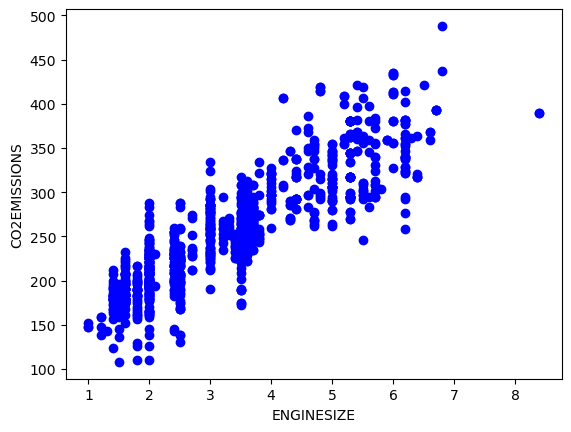

In [4]:
plt.scatter(cf['ENGINESIZE'],cf['CO2EMISSIONS'],color='b')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [5]:
msk=np.random.rand(len(df))<0.8
train=cf[msk]
test=cf[~msk]


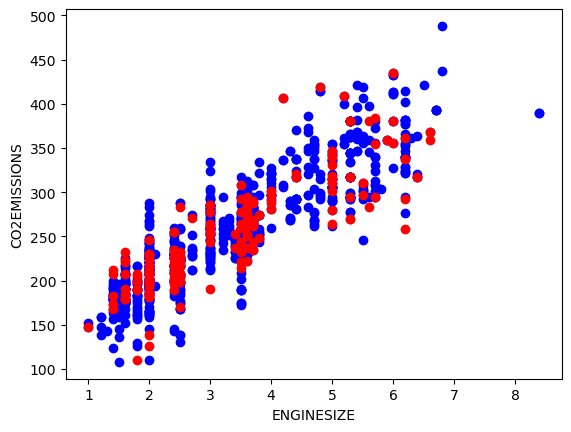

In [6]:
fig=plt.figure()
a1=fig.add_subplot(111)
a1.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color='b')
a1.scatter(test['ENGINESIZE'],test['CO2EMISSIONS'],color='r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

# Polynomial

In [7]:
from sklearn.preprocessing import PolynomialFeatures
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])


In [8]:
poly = PolynomialFeatures(degree=2)
print(train_x[:3])
train_x_poly=poly.fit_transform(train_x)
print(train_x_poly)

[[2. ]
 [1.5]
 [3.5]]
[[ 1.    2.    4.  ]
 [ 1.    1.5   2.25]
 [ 1.    3.5  12.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


## plot

In [9]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_y_=regr.fit(train_x_poly,train_y)

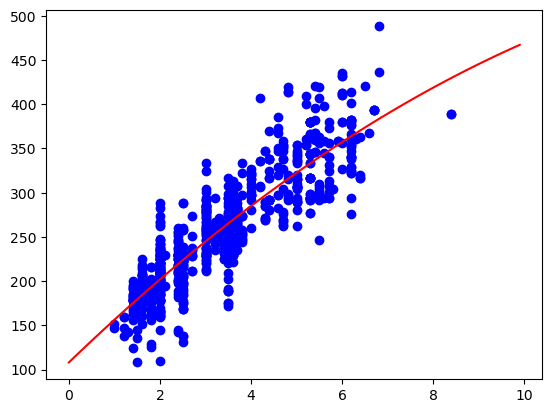

In [10]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color='b')
xx=np.arange(0.0,10.0,0.1)
yy=regr.intercept_+regr.coef_[0][1]*xx+regr.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,color='r')

 ## comparison

In [11]:
from sklearn.metrics import r2_score
test_x_poly=poly.fit_transform(test_x)
test_y_=regr.predict(test_x_poly)
r2_score(test_y,test_y_)

0.7257839238209154